In [1]:
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime as dtime

In [2]:
def rotaciona_corrente(zonal, meridional, phi):
    phi = np.deg2rad(phi)
    ul = zonal * np.cos(phi) + meridional * np.sin(phi)
    vl = -zonal * np.sin(phi) + meridional * np.cos(phi)
    return ul, vl

In [3]:
def meanError(y, x):
    """
    x = observed data
    y = modeladed data
    """
    values = (y-x)/x
    value = 100*np.nanmean(values)
    value = '{:.2f}%'.format(value)
    return value

In [4]:
plt.style.use('default')

plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["legend.title_fontsize"] = 12
plt.rcParams["figure.figsize"] = (8, 5)

In [5]:
%matplotlib inline

In [6]:
cd '/home/gus/Documentos/mestrado/dados-mestrado/dados-hycom/saidas1h'

/home/gus/Documentos/mestrado/dados-mestrado/dados-hycom/saidas1h


## lendo dados da boia

In [7]:
path = '/home/gus/Documentos/mestrado/dados-mestrado/dados-adcp-completos'

In [8]:
uboia = pd.read_csv(path+ '/adcp-zonal-limpo.csv', delimiter= ';')
vboia = pd.read_csv(path+ '/adcp-meridional-limpo.csv', delimiter= ';')

In [9]:
uboia.head()

,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,...,u12,u13,u14,u15,u16,u17,u18,u19,u20,time
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-11-18 20:00:00
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-11-18 21:00:00
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-11-18 22:00:00
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-11-18 23:00:00
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-11-19 00:00:00


In [10]:
timeAdcp = uboia.time
timeAdcpDatetime = [dtime.strptime(ii, '%Y-%m-%d %H:%M:%S') for ii in timeAdcp]

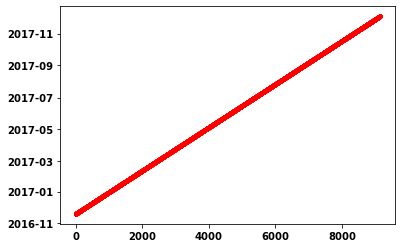

In [11]:
plt.plot(timeAdcpDatetime,'.r')

In [12]:
u = np.array(uboia.iloc[:,0:20])
v = np.array(vboia.iloc[:,0:20])

In [13]:
ulboia, vlboia = rotaciona_corrente(u, v, 60)

In [14]:
del u, v

In [15]:
len(ulboia)

9138

### Profundidade da boia

In [16]:
depthBoia = np.arange(5.5, 55, 2.5)

## Lendo dados do hycom

In [17]:
ulhycom = pd.read_csv('hycom_ul_total_ajustado1h.csv', delimiter=';')
vlhycom = pd.read_csv('hycom_vl_total_ajustado1h.csv', delimiter=';')

In [18]:
#depthHycom = ulhycom.columns[0:16]
#depthHycom = [float(ii) for ii in depthHycom]

In [19]:
ulhycom.time.min(), ulhycom.time.max()

('2016-12-01 12:00:00', '2017-09-19 08:00:00')

In [20]:
timeHycom = ulhycom.time

In [21]:
ulhycom.drop(['time'], axis=1, inplace=True)
vlhycom.drop(['time'], axis=1, inplace=True)

### ajustando as matrizes do hycom e adcp

In [22]:
min(timeAdcpDatetime), max(timeAdcpDatetime)

(datetime.datetime(2016, 11, 18, 20, 0), datetime.datetime(2017, 12, 4, 13, 0))

In [23]:
tmin = '2016-12-01 12:00:00'
tmax = '2017-09-19 08:00:00'

In [24]:
tmin = dtime.strptime(tmin, '%Y-%m-%d %H:%M:%S')
tmax = dtime.strptime(tmax, '%Y-%m-%d %H:%M:%S')

In [25]:
timeAdcpDatetime = np.array(timeAdcpDatetime)

In [26]:
condtime = ((timeAdcpDatetime <= tmax) & (timeAdcpDatetime >= tmin))

In [27]:
min(timeAdcpDatetime[condtime]), max(timeAdcpDatetime[condtime])

(datetime.datetime(2016, 12, 1, 12, 0), datetime.datetime(2017, 9, 19, 8, 0))

In [28]:
ulboia = ulboia[condtime, :]
vlboia = vlboia[condtime, :]

In [29]:
if len(ulboia) == len(ulhycom):
    print('Matrizes ajustadas!')

Matrizes ajustadas!


In [30]:
list(enumerate(depthBoia))

[(0, 5.5),
 (1, 8.0),
 (2, 10.5),
 (3, 13.0),
 (4, 15.5),
 (5, 18.0),
 (6, 20.5),
 (7, 23.0),
 (8, 25.5),
 (9, 28.0),
 (10, 30.5),
 (11, 33.0),
 (12, 35.5),
 (13, 38.0),
 (14, 40.5),
 (15, 43.0),
 (16, 45.5),
 (17, 48.0),
 (18, 50.5),
 (19, 53.0)]

In [31]:
#list(enumerate(depthHycom))

In [32]:
ulhycom[ulhycom>150] = np.NaN
vlhycom[vlhycom>150] = np.NaN

In [33]:
ulboia[ulboia>150] = np.NaN
vlboia[vlboia>150] = np.NaN

/tmp/ipykernel_21909/2496832416.py:1: RuntimeWarning: invalid value encountered in greater
  ulboia[ulboia>150] = np.NaN
/tmp/ipykernel_21909/2496832416.py:2: RuntimeWarning: invalid value encountered in greater
  vlboia[vlboia>150] = np.NaN


In [34]:
timeAdcp[condtime]

304     2016-12-01 12:00:00
305     2016-12-01 13:00:00
306     2016-12-01 14:00:00
307     2016-12-01 15:00:00
308     2016-12-01 16:00:00
               ...         
7304    2017-09-19 04:00:00
7305    2017-09-19 05:00:00
7306    2017-09-19 06:00:00
7307    2017-09-19 07:00:00
7308    2017-09-19 08:00:00
Name: time, Length: 7005, dtype: object

In [35]:
timeplots = mdates.datestr2num(timeAdcp[condtime])

In [36]:
myfmt = mdates.DateFormatter('%Y-%m-%d')

In [37]:
ulhycom.shape

(7005, 4)

### Perpendicular a costa

Text(0.5, 0, 'Time (days)')

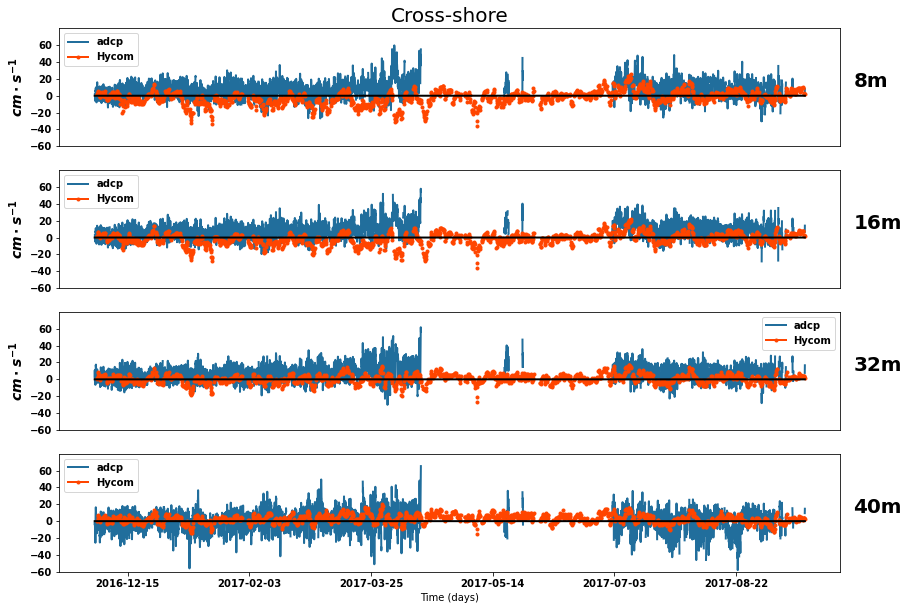

In [38]:
# perpendicular a costa
linhaZero = np.zeros(len(ulboia))

fig, ax = plt.subplots(nrows=4, figsize=(14,10))

# 8m
ax[0].plot(timeplots, ulboia[:, 1], c='#216e9c',label='adcp')
ax[0].plot(timeplots, ulhycom.iloc[:, 0], marker= '.' ,c='orangered',label='Hycom')
ax[0].plot(timeplots, linhaZero, c='black')


# 16m
ax[1].plot(timeplots, ulboia[:, 4], c='#216e9c',label='adcp')
ax[1].plot(timeplots, ulhycom.iloc[:, 1], marker='.'  ,c='orangered',label='Hycom')
ax[1].plot(timeplots, linhaZero,c='black')

#32 m
ax[2].plot(timeplots, ulboia[:, 10], c='#216e9c',label='adcp')
ax[2].plot(timeplots, ulhycom.iloc[:, 2], marker='.'  ,c='orangered',label='Hycom')
ax[2].plot(timeplots, linhaZero,c='black')



#40 m
ax[3].plot(timeplots, ulboia[:, 14], c='#216e9c',label='adcp')
ax[3].plot(timeplots, ulhycom.iloc[:, 3], marker='.'  ,c='orangered',label='Hycom')
ax[3].plot(timeplots, linhaZero,c='black')



#limites em y
ax[0].set_ylim([-60, 80])
ax[1].set_ylim([-60, 80])
ax[2].set_ylim([-60, 80])
ax[3].set_ylim([-60, 80])



#ticks em y
ax[0].set_yticks(range(-60, 80, 20))
ax[1].set_yticks(range(-60, 80, 20))
ax[2].set_yticks(range(-60, 80, 20))
ax[3].set_yticks(range(-60, 80, 20))



ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()

# profundidades
ax[0].text(max(timeplots)+20, 10, '8m', fontsize=20)
ax[1].text(max(timeplots)+20, 10, '16m', fontsize=20)
ax[2].text(max(timeplots)+20, 10, '32m', fontsize=20)
ax[3].text(max(timeplots)+20, 10, '40m', fontsize=20)


# ticks em x
ax[0].set_xticks([])
ax[1].set_xticks([])
ax[2].set_xticks([])



#titulo 
ax[0].set_title('Cross-shore', fontsize=20)

#ylabel
ax[0].set_ylabel(r'$cm\cdot s^{-1}$', fontsize=14)
ax[1].set_ylabel(r'$cm\cdot s^{-1}$', fontsize=14)
ax[2].set_ylabel(r'$cm\cdot s^{-1}$', fontsize=14)

#Datas
ax[3].xaxis.set_major_formatter(myfmt)

ax[3].set_xlabel('Time (days)')

Text(0.5, 0, 'Time (days)')

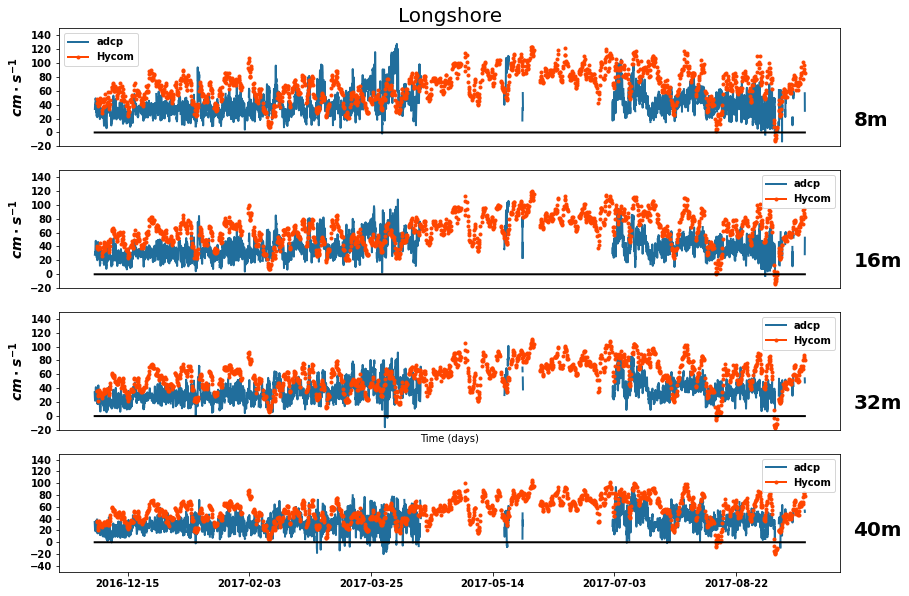

In [39]:
# perpendicular a costa
linhaZero = np.zeros(len(ulboia))

fig, ax = plt.subplots(nrows=4, figsize=(14,10))

# 8m
ax[0].plot(timeplots, vlboia[:, 1], c='#216e9c',label='adcp')
ax[0].plot(timeplots, vlhycom.iloc[:, 0],marker='.' ,c='orangered',label='Hycom')
ax[0].plot(timeplots, linhaZero, c='black')


# 16m
ax[1].plot(timeplots, vlboia[:, 4], c='#216e9c',label='adcp')
ax[1].plot(timeplots, vlhycom.iloc[:, 1],marker='.'  ,c='orangered',label='Hycom')
ax[1].plot(timeplots, linhaZero,c='black')

#32 m
ax[2].plot(timeplots, vlboia[:, 10], c='#216e9c',label='adcp')
ax[2].plot(timeplots, vlhycom.iloc[:, 2],marker='.'  ,c='orangered',label='Hycom')
ax[2].plot(timeplots, linhaZero,c='black')

#40 m
ax[3].plot(timeplots, vlboia[:, 14], c='#216e9c',label='adcp')
ax[3].plot(timeplots, vlhycom.iloc[:, 3], marker='.'  ,c='orangered',label='Hycom')
ax[3].plot(timeplots, linhaZero,c='black')

#limites em y

ax[0].set_ylim([-20, 150])
ax[1].set_ylim([-20, 150])
ax[2].set_ylim([-20, 150])
ax[3].set_ylim([-50, 150])

#ticks em y
ax[0].set_yticks(range(-20, 160, 20))
ax[1].set_yticks(range(-20, 160, 20))
ax[2].set_yticks(range(-20, 160, 20))
ax[3].set_yticks(range(-40, 160, 20))


# ticks em x
ax[0].set_xticks([])
ax[1].set_xticks([])
ax[2].set_xticks([])


ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()


# profundidades
ax[0].text(max(timeplots)+20, 10, '8m', fontsize=20)
ax[1].text(max(timeplots)+20, 10, '16m', fontsize=20)
ax[2].text(max(timeplots)+20, 10, '32m', fontsize=20)
ax[3].text(max(timeplots)+20, 10, '40m', fontsize=20)


#titulo 
ax[0].set_title('Longshore', fontsize=20)

#ylabel
ax[0].set_ylabel(r'$cm\cdot s^{-1}$', fontsize=14)
ax[1].set_ylabel(r'$cm\cdot s^{-1}$', fontsize=14)
ax[2].set_ylabel(r'$cm\cdot s^{-1}$', fontsize=14)


#Datas
ax[3].xaxis.set_major_formatter(myfmt)


ax[2].set_xlabel('Time (days)')

### PARAMETROS ESTATISTICOS

In [41]:
import mvalidation

In [42]:
# z= 8, 16, 32 e 40 m
indexHycom = [0, 1, 2, 3]
indexBoia = [1, 4, 10, 14]

## SKILL

#### Paralelo

In [43]:
for ii, jj in zip(indexBoia, indexHycom):
    print(mvalidation.skill(vlboia[:,ii], vlhycom.iloc[:,jj]))

0.6464105229267456
0.6471586627918362
0.6427448432370801
0.6523385728941391


#### perpendicular

In [44]:
for ii, jj in zip(indexBoia, indexHycom):
    print(mvalidation.skill(ulboia[:,ii], ulhycom.iloc[:,jj]))

0.5657016672288491
0.5837510162444561
0.5322053347227209
0.3750161955654908


## RMSE

#### perpendicular

In [45]:
for ii, jj in zip(indexBoia, indexHycom):
    print(mvalidation.rmse(vlboia[:,ii], vlhycom.iloc[:,jj]))

13.338944342603417
12.824964233322978
11.67696726498636
11.019624364617513


#### paralelo

In [46]:
for ii, jj in zip(indexBoia, indexHycom):
    print(mvalidation.rmse(ulboia[:,ii], ulhycom.iloc[:,jj]))

7.002645196739688
6.474364027147992
5.405717102767735
5.381695127525057


## ERRO MÉDIO

In [47]:
for jj, ii in zip(indexHycom, indexBoia):
    print(meanError(ulboia[:, ii], ulhycom.iloc[:, jj]))

-155.97%
-31.77%
-1742.28%
-216.67%


In [48]:
for jj, ii in zip(indexHycom, indexBoia):
    print(meanError(vlboia[:, ii], vlhycom.iloc[:, jj]))

-17.33%
22.72%
-15.01%
-129.47%


Text(0.5, 0, 'CROSS-SHORE (cm/s)')

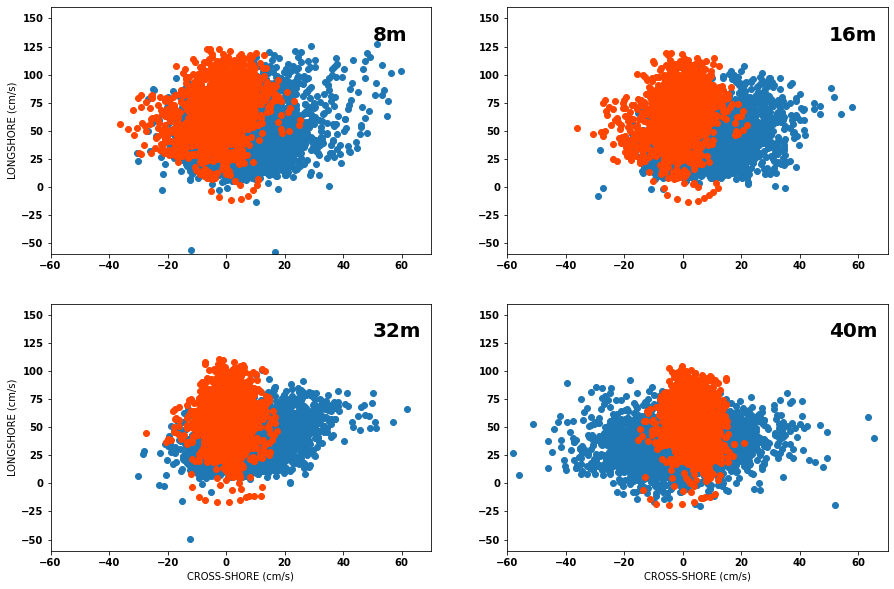

In [49]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

ax[0][0].scatter(ulboia[:,1], vlboia[:,1])# 8m
ax[0][0].scatter(ulhycom.iloc[:,0], vlhycom.iloc[:,0],c='orangered')# 8m

ax[0][1].scatter(ulboia[:,4], vlboia[:,4])# 16m
ax[0][1].scatter(ulhycom.iloc[:,1], vlhycom.iloc[:,1],c='orangered')# 16m

ax[1][0].scatter(ulboia[:,10], vlboia[:,10])# 32m
ax[1][0].scatter(ulhycom.iloc[:,2], vlhycom.iloc[:,2],c='orangered')# 32m

ax[1][1].scatter(ulboia[:,14], vlboia[:,14])# 40m
ax[1][1].scatter(ulhycom.iloc[:,3], vlhycom.iloc[:,3],c='orangered')# 40m


ax[0][0].set_ylim([-60, 160])
ax[0][1].set_ylim([-60, 160])
ax[1][0].set_ylim([-60, 160])
ax[1][1].set_ylim([-60, 160])

ax[0][0].set_xlim([-60, 70])
ax[0][1].set_xlim([-60, 70])
ax[1][0].set_xlim([-60, 70])
ax[1][1].set_xlim([-60, 70])




# profundidades
ax[0][0].text(50, 130, '8m', fontsize=20)
ax[0][1].text(50, 130, '16m', fontsize=20)
ax[1][0].text(50, 130, '32m', fontsize=20)
ax[1][1].text(50, 130, '40m', fontsize=20)




ax[0][0].set_ylabel('LONGSHORE (cm/s)')
ax[1][0].set_ylabel('LONGSHORE (cm/s)')

ax[1][0].set_xlabel('CROSS-SHORE (cm/s)')
ax[1][1].set_xlabel('CROSS-SHORE (cm/s)')